In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Hipóteses

## Primeira hipótese
*É possível agrupar os usuários de acordo com o tipo de comida que consomem*
- MntWines
- MntFruits
- MntMeatProducts
- MntFishProducts
- MntSweetProducts
- MntGoldProds

## Segunda hipótese
*É possível agrupar os usuários de acordo com a forma de compra*
- NumDealsPurchases
- NumWebPurchases
- NumCatalogPurchases
- NumStorePurchases

## Terceira hipótese
*Clientes com famílias maiores possuem menor tempo desde a última compra*

## Quarta hipótese
*Um determinado grupo (cluster) tende a ser mais afetado pelo mkt*

## Quinta hipótese
*Os clientes de renda mais baixa representam que quantidade das compras? Pertencem a um grupo específico?*

## Sexta hipótese
*Quem tende a comprar mais? Solteiros ou casados? Quem compra com mais frequência?*

In [2]:
dataset = pd.read_csv("../data/dataset.csv")

In [18]:
# Cria a forma de agrupar os clientes no tipo de produto
x_produto = dataset[[
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]]
cluster_produto = KMeans(n_clusters=6, random_state=0)
cluster_produto.fit(x.values)

KMeans(n_clusters=6, random_state=0)

In [19]:
# Cria a forma de agrupar os clientes na forma de compra
x_forma_compra = dataset[[
    "NumDealsPurchases", "NumWebPurchases",
    "NumCatalogPurchases", "NumStorePurchases"
]]
cluster_forma_compra = KMeans(n_clusters=8, random_state=0)
cluster_forma_compra.fit(x.values)

KMeans(random_state=0)

In [22]:
x_forma_compra["grupo_compra"] = cluster_forma_compra.labels_


/tmp/ipykernel_6614/1186436130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_forma_compra["grupo_compra"] = cluster_forma_compra.labels_


In [23]:
x_forma_compra

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,grupo_comra,grupo_compra
0,3,8,10,4,4,4
1,2,1,1,2,5,5
2,1,8,2,10,1,1
3,2,2,0,4,5,5
4,5,5,3,6,1,1
...,...,...,...,...,...,...
2235,2,9,3,4,7,7
2236,7,8,2,5,1,1
2237,1,2,3,13,6,6
2238,2,6,5,10,1,1


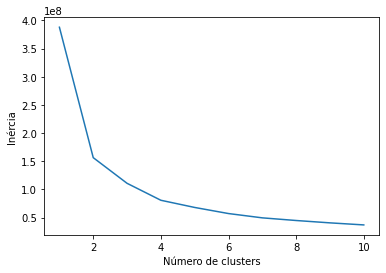

In [12]:
# Avaliando número de clusters para o tipo de produto
inercia = []
for i in range(1, 11):
    cluster = KMeans(n_clusters=i, random_state=0)
    cluster.fit(x_produto.values)
    inercia.append(cluster.inertia_)
    
plt.plot(range(1, 11), inercia)
plt.xlabel("Número de clusters")
plt.ylabel("Inércia") 
plt.show()

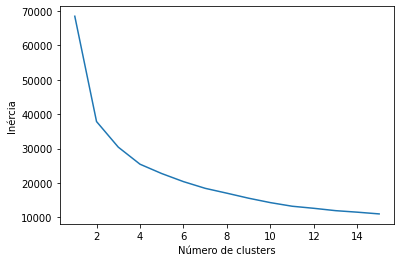

In [17]:
# Avaliando número de clusters para a forma de compra
inercia = []
for i in range(1, 16):
    cluster = KMeans(n_clusters=i, random_state=0)
    cluster.fit(x_forma_compra.values)
    inercia.append(cluster.inertia_)
    
plt.plot(range(1, 16), inercia)
plt.xlabel("Número de clusters")
plt.ylabel("Inércia") 
plt.show()

In [7]:
x

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


In [3]:
dataset.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
dataset

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0
